A/B-тестирование (семинары)
Урок 9. Python применение продвинутых методов:
    
Проанализируйте результаты эксперимента и напишите свои рекомендации менеджеру.
Mobile Games AB Testing with Cookie Cats

Ознакомимся с данными, подготовим их к анализу (изучим содержимое и подчистим), сравним тестовую и контрольную группы в сроках 1 и семь дней, определим нормально ли распределение, посмотрим pvalue, 

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import mannwhitneyu
from scipy.stats import ttest_ind
from scipy.stats import kstest

In [32]:
df = pd.read_csv('cookie_cats.csv')
df

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True
...,...,...,...,...,...
90184,9999441,gate_40,97,True,False
90185,9999479,gate_40,30,False,False
90186,9999710,gate_30,28,True,False
90187,9999768,gate_40,51,True,False


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90189 entries, 0 to 90188
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   userid          90189 non-null  int64 
 1   version         90189 non-null  object
 2   sum_gamerounds  90189 non-null  int64 
 3   retention_1     90189 non-null  bool  
 4   retention_7     90189 non-null  bool  
dtypes: bool(2), int64(2), object(1)
memory usage: 2.2+ MB


In [34]:
df.describe()

,userid,sum_gamerounds
count,9.018900e+04,90189.000000
mean,4.998412e+06,51.872457
std,2.883286e+06,195.050858
min,1.160000e+02,0.000000
25%,2.512230e+06,5.000000
50%,4.995815e+06,16.000000
75%,7.496452e+06,51.000000
max,9.999861e+06,49854.000000


In [35]:
df.version.unique()

array(['gate_30', 'gate_40'], dtype=object)

In [36]:
df.nlargest(5, ['sum_gamerounds'])

,userid,version,sum_gamerounds,retention_1,retention_7
57702,6390605,gate_30,49854,False,True
7912,871500,gate_30,2961,True,True
29417,3271615,gate_40,2640,True,False
43671,4832608,gate_30,2438,True,True
48188,5346171,gate_40,2294,True,True


In [37]:
df = df[df.sum_gamerounds < 2999]

In [38]:
df.describe()

,userid,sum_gamerounds
count,9.018800e+04,90188.000000
mean,4.998397e+06,51.320253
std,2.883298e+06,102.682719
min,1.160000e+02,0.000000
25%,2.512211e+06,5.000000
50%,4.995804e+06,16.000000
75%,7.496461e+06,51.000000
max,9.999861e+06,2961.000000


In [39]:
Old = df.version.groupby(df.version == 'gate_30').count()
New = df.version.groupby(df.version == 'gate_40').count()
print(Old, New)

version
False    45489
True     44699
Name: version, dtype: int64 version
False    44699
True     45489
Name: version, dtype: int64


In [40]:
mannwhitneyu(df[df.version == 'gate_30'].sum_gamerounds,
             df[df.version == 'gate_40'].sum_gamerounds)

MannwhitneyuResult(statistic=1024285761.5, pvalue=0.05089155279145376)

In [41]:
ttest_ind(df[df.version == 'gate_30'].sum_gamerounds,
          df[df.version == 'gate_40'].sum_gamerounds)

Ttest_indResult(statistic=0.0633675766982082, pvalue=0.9494739458256001)

In [42]:
print(kstest(df['sum_gamerounds'][df.version == 'gate_30'], 'norm'))
print(kstest(df['sum_gamerounds'][df.version == 'gate_40'], 'norm'))

KstestResult(statistic=0.8724153079945488, pvalue=0.0)
KstestResult(statistic=0.8707186187388001, pvalue=0.0)


Text(0.5, 1.0, 'Number of game rounds players on the first week')

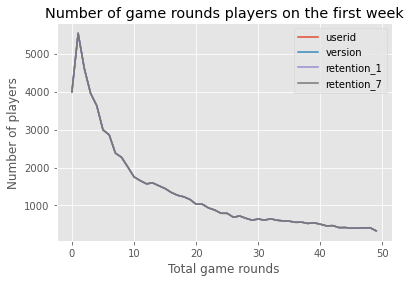

In [45]:
plot_df = df.groupby('sum_gamerounds').count()
ax = plot_df[:50].plot()
ax.set_ylabel('Number of players')
ax.set_xlabel('Total game rounds')
ax.set_title('Number of game rounds players on the first week')

In [46]:
plt.style.use('ggplot')
OldGroup = df[df.version == 'gate_30']
print(OldGroup.head())

    userid  version  sum_gamerounds  retention_1  retention_7
0      116  gate_30               3        False        False
1      337  gate_30              38         True        False
6     1066  gate_30               0        False        False
11    2101  gate_30               0        False        False
13    2179  gate_30              39         True        False


In [47]:
NewGroup = df[df.version == 'gate_40']
print(NewGroup.head())

   userid  version  sum_gamerounds  retention_1  retention_7
2     377  gate_40             165         True        False
3     483  gate_40               1        False        False
4     488  gate_40             179         True         True
5     540  gate_40             187         True         True
7    1444  gate_40               2        False        False


In [48]:
bins = [0, 1, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 200, 500]
plot_GA = pd.DataFrame(OldGroup.groupby(pd.cut(OldGroup['sum_gamerounds'], bins=bins)).count())
plot_GB = pd.DataFrame(NewGroup.groupby(pd.cut(NewGroup['sum_gamerounds'], bins=bins)).count())

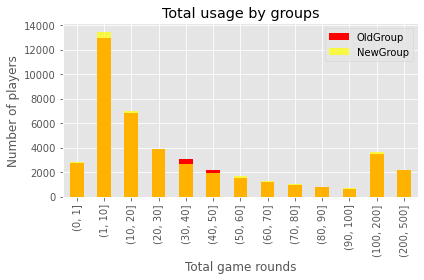

In [49]:
ax = plot_GA.plot(kind = 'bar', y='userid', color = 'red', alpha = 1, title = 'Total usage by groups')
plot_GB.plot(kind = 'bar', y = 'userid', ax = ax, color = 'yellow', alpha = 0.7)
ax.set_xlabel('Total game rounds')
ax.set_ylabel('Number of players')
plt.legend(['OldGroup', 'NewGroup'])
plt.tight_layout()
plt.grid(True)

In [50]:
OneDay = df.retention_1.sum()/df.retention_1.count()
print(str(OneDay*100)+'%')

44.521444094558035%


In [51]:
OneDay = df.retention_1.groupby(df.version).sum()/df.retention_1.groupby(df.version).count()
print(OneDay*100)

version
gate_30    44.819795
gate_40    44.228275
Name: retention_1, dtype: float64


In [56]:
df.groupby('version')['retention_7'].sum() / df.groupby('version')['retention_7'].count()

version
gate_30    0.190183
gate_40    0.182000
Name: retention_7, dtype: float64

Результаты проведенного анализа дают основание думать о недостаточности теста для принятия решения, разница между группами маленькая, в т.ч. в разрезе 1 и 7 дней, но у версии gate_30 результаты все же лучше второй. 
Считаю, что имеет смысл изменение не вводить, тест по возможности провести повторно с повышенным вниманием к его планированию и проведению.